In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Listas de los valores del ángulo

In [2]:
# Valores del ángulo de deslizamiento medida con el transportador integrado
# en la madera y en la tela, con una resolución de

resolution = 1 # grades

integrated_fabric = [26, 28, 30, 25, 30, 26, 27, 27, 31, 29,
                     29, 30, 30, 27, 28, 27, 28, 30, 26, 29, 
                     27, 28, 25, 27, 28, 26, 26, 26, 28, 30]

integrated_wood = [36, 30, 30, 29, 34, 30, 30, 28, 26, 36,
                   30, 33, 25, 28, 30, 28, 31, 29, 29, 32,
                   32, 31, 34, 29, 27, 31, 29, 28, 25, 33]

In [3]:
#Valores de los ángulos para el lado del trapo

# Leemos el archivo de datos .csv
app_fabric = pd.read_csv('app_fabric.csv')

# Obtenemos los índices de los 30 valores más grandes
top_30_index = app_fabric["Tilt up/down (deg)"].nlargest(30).index
top_30_index = top_30_index.sort_values(ascending=True)


# Seleccionamos los datos originales utilizando los índices obtenidos
app_fabric_top30 = app_fabric["Tilt up/down (deg)"].loc[top_30_index].to_numpy()

print(app_fabric_top30)
hola = 1

[26.48272815 26.73569031 26.89266785 27.05401829 27.37127309 27.51590634
 27.79329407 27.94986361 28.17869817 27.89401942 26.46903927 26.63207893
 27.97713125 26.65047876 26.65047876 26.91745951 26.60772409 27.31102816
 26.60770707 27.00087829 27.15317976 27.31304785 27.52024637 27.7858402
 28.35793522 27.01617787 26.44915458 26.58180768 26.89742774 28.00275131]


In [4]:
#Valores de los ángulos para el lado de la madera

# Leemos el archivo de datos .csv
app_wood = pd.read_csv('app_wood.csv')

# Obtenemos los índices de los 30 valores más grandes
top_30_index = app_wood["Tilt up/down (deg)"].nlargest(30).index
top_30_index = top_30_index.sort_values(ascending=True)


# Seleccionamos los datos originales utilizando los índices obtenidos
app_wood_top30 = app_wood["Tilt up/down (deg)"].loc[top_30_index].to_numpy()

print(app_wood_top30)

[32.14693855 31.54492073 31.68200306 32.02379439 32.48738931 32.9573605
 33.86607539 31.78044329 32.2230571  33.05573169 31.63497328 31.79879473
 32.05340946 32.34005655 32.82734295 33.32940734 34.43005305 31.81916721
 32.31215862 31.57799939 31.58585709 31.8218651  32.33718004 32.54115227
 32.91381869 31.65934658 31.83526586 31.75892669 32.70154538 31.97536889]


In [5]:
# Redondeamos los valores de los ángulos a dos cifras decimales

app_fabric_top30 = np.round(app_fabric_top30, 2)
app_wood_top30 = np.round(app_wood_top30, 2)

print(app_fabric_top30)
print(app_wood_top30)

[26.48 26.74 26.89 27.05 27.37 27.52 27.79 27.95 28.18 27.89 26.47 26.63
 27.98 26.65 26.65 26.92 26.61 27.31 26.61 27.   27.15 27.31 27.52 27.79
 28.36 27.02 26.45 26.58 26.9  28.  ]
[32.15 31.54 31.68 32.02 32.49 32.96 33.87 31.78 32.22 33.06 31.63 31.8
 32.05 32.34 32.83 33.33 34.43 31.82 32.31 31.58 31.59 31.82 32.34 32.54
 32.91 31.66 31.84 31.76 32.7  31.98]


# Gráficas

## Lado del trapo


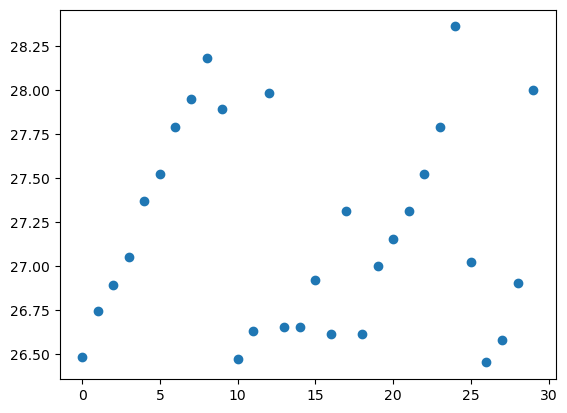

In [6]:
plt.plot(app_fabric_top30, "o")

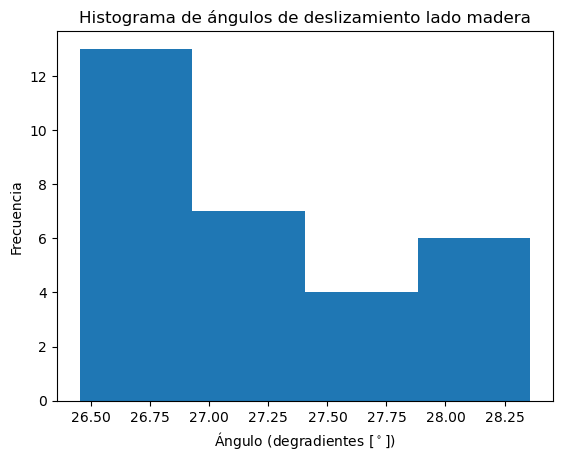

In [7]:
fig, ax = plt.subplots()
plt.hist(app_fabric_top30, bins = 4)

#medida de caras con bin = 5
plt.title("Histograma de ángulos de deslizamiento lado madera")

ax.set_xlabel(r'Ángulo (degradientes [$^\circ$])')
ax.set_ylabel('Frecuencia')

plt.savefig('histograma_tela.png', dpi=300)
plt.show()

## Lado de la madera

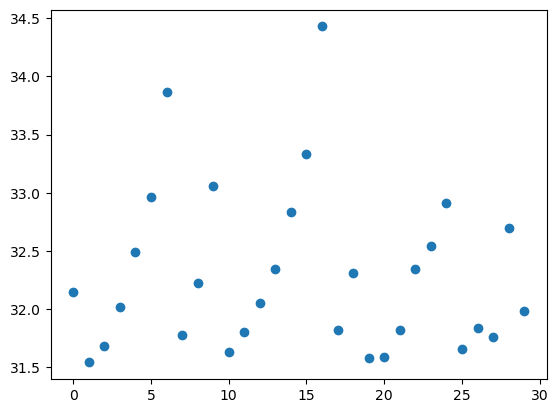

In [8]:
plt.plot(app_wood_top30, "o")

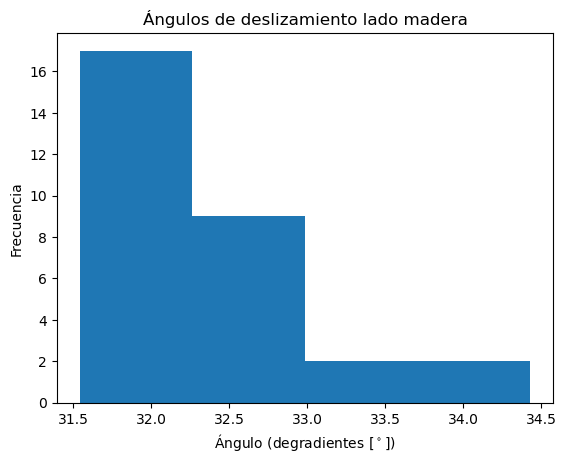

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
plt.hist(app_wood_top30, bins = 4)

#medida de caras con bin = 5
plt.title("Ángulos de deslizamiento lado madera")

ax.set_xlabel(r'Ángulo (degradientes [$^\circ$])')
ax.set_ylabel('Frecuencia')


plt.show()
plt.savefig('histograma_madera.png')

# Repeticion del valor de cada ángulo


## Lado del trapo

In [10]:
#Cuantas veces se repite cada valor del angulo para el lado de trapo

# Creamos un diccionario vacío para almacenar los conteos de cada número
conteos = {}

# Iteramos sobre la lista de números
for numero in integrated_fabric:
    # Si el número no está en el diccionario, lo agregamos y establecemos su conteo inicial en 1
    if numero not in conteos:
        conteos[numero] = 1
    else:
        # Si el número ya está en el diccionario, incrementamos su conteo en 1
        conteos[numero] += 1

# Imprimimos los resultados
for numero, conteo in conteos.items():
    print(f"El número {numero} se repite {conteo} veces.")

El número 26 se repite 6 veces.
El número 28 se repite 6 veces.
El número 30 se repite 6 veces.
El número 25 se repite 2 veces.
El número 27 se repite 6 veces.
El número 31 se repite 1 veces.
El número 29 se repite 3 veces.


In [11]:
# Redondear cada número en la lista a dos decimales
lista_redondeada1 = [round(numero, 2) for numero in app_fabric_top30]

# Contar las repeticiones de cada número redondeado
conteo = Counter(lista_redondeada1)

# Imprimir los resultados
for numero, repeticiones in conteo.items():
    print(f"El número {numero} se repite {repeticiones} veces.")

El número 26.48 se repite 1 veces.
El número 26.74 se repite 1 veces.
El número 26.89 se repite 1 veces.
El número 27.05 se repite 1 veces.
El número 27.37 se repite 1 veces.
El número 27.52 se repite 2 veces.
El número 27.79 se repite 2 veces.
El número 27.95 se repite 1 veces.
El número 28.18 se repite 1 veces.
El número 27.89 se repite 1 veces.
El número 26.47 se repite 1 veces.
El número 26.63 se repite 1 veces.
El número 27.98 se repite 1 veces.
El número 26.65 se repite 2 veces.
El número 26.92 se repite 1 veces.
El número 26.61 se repite 2 veces.
El número 27.31 se repite 2 veces.
El número 27.0 se repite 1 veces.
El número 27.15 se repite 1 veces.
El número 28.36 se repite 1 veces.
El número 27.02 se repite 1 veces.
El número 26.45 se repite 1 veces.
El número 26.58 se repite 1 veces.
El número 26.9 se repite 1 veces.
El número 28.0 se repite 1 veces.


## Lado de la madera

In [12]:
#Cuantas veces se repite cada medida del angulo para el lado de madera

# Creamos un diccionario vacío para almacenar los conteos de cada número
conteos = {}

# Iteramos sobre la lista de números
for numero in integrated_wood:
    # Si el número no está en el diccionario, lo agregamos y establecemos su conteo inicial en 1
    if numero not in conteos:
        conteos[numero] = 1
    else:
        # Si el número ya está en el diccionario, incrementamos su conteo en 1
        conteos[numero] += 1

# Imprimimos los resultados
for numero, conteo in conteos.items():
    print(f"El número {numero} se repite {conteo} veces.")

El número 36 se repite 2 veces.
El número 30 se repite 6 veces.
El número 29 se repite 5 veces.
El número 34 se repite 2 veces.
El número 28 se repite 4 veces.
El número 26 se repite 1 veces.
El número 33 se repite 2 veces.
El número 25 se repite 2 veces.
El número 31 se repite 3 veces.
El número 32 se repite 2 veces.
El número 27 se repite 1 veces.


In [13]:
# Redondear cada número en la lista a dos decimales
lista_redondeada2 = [round(numero, 2) for numero in app_wood_top30]

# Contar las repeticiones de cada número redondeado
conteo = Counter(lista_redondeada2)

# Imprimir los resultados
for numero, repeticiones in conteo.items():
    print(f"El número {numero} se repite {repeticiones} veces.")

El número 32.15 se repite 1 veces.
El número 31.54 se repite 1 veces.
El número 31.68 se repite 1 veces.
El número 32.02 se repite 1 veces.
El número 32.49 se repite 1 veces.
El número 32.96 se repite 1 veces.
El número 33.87 se repite 1 veces.
El número 31.78 se repite 1 veces.
El número 32.22 se repite 1 veces.
El número 33.06 se repite 1 veces.
El número 31.63 se repite 1 veces.
El número 31.8 se repite 1 veces.
El número 32.05 se repite 1 veces.
El número 32.34 se repite 2 veces.
El número 32.83 se repite 1 veces.
El número 33.33 se repite 1 veces.
El número 34.43 se repite 1 veces.
El número 31.82 se repite 2 veces.
El número 32.31 se repite 1 veces.
El número 31.58 se repite 1 veces.
El número 31.59 se repite 1 veces.
El número 32.54 se repite 1 veces.
El número 32.91 se repite 1 veces.
El número 31.66 se repite 1 veces.
El número 31.84 se repite 1 veces.
El número 31.76 se repite 1 veces.
El número 32.7 se repite 1 veces.
El número 31.98 se repite 1 veces.


Para reportar correctamente el ángulo medido con la incertudumbre asociado 

In [14]:
# TELA APP

# Calcula la media y la desviación estándar
media_fabric = np.mean(app_fabric_top30)
desvest_fabric = np.std(app_fabric_top30)

# Calcula la incertidumbre estándar
incertest_fabric = desvest_fabric / np.sqrt(len(app_fabric_top30))

print("Media apptela:", media_fabric)
print("Desvest apptela:", desvest_fabric)
print("Incertest apptela:", incertest_fabric)

Media apptela: 27.192333333333337
Desvest apptela: 0.5698870258412824
Incertest apptela: 0.10404665976093329


In [15]:
# TELA TRANSPORTADOR

# Calcula la media y la desviación estándar
media_fabric1 = np.mean(integrated_fabric)
desvest_fabric1 = np.std(integrated_fabric)

# Calcula la incertidumbre estándar
incertest_fabric1 = desvest_fabric1 / np.sqrt(len(integrated_fabric))

print("Media transtela:", media_fabric1)
print("Desvest transtela:", desvest_fabric1)
print("Incertest transtela:", incertest_fabric1)

Media transtela: 27.8
Desvest transtela: 1.6613247725836153
Incertest transtela: 0.3033150177620621


In [16]:
# MADERA APP

# Calcula la media y la desviación estándar
media_wood = np.mean(app_wood_top30)
desvest_wood = np.std(app_wood_top30)

# Calcula la incertidumbre estándar
incertest_wood = desvest_wood / np.sqrt(len(app_wood_top30))

print("Media appmadera:", media_wood)
print("Desvest appmadera:", desvest_wood)
print("Incertest appmadera:", incertest_wood)


Media appmadera: 32.301
Desvest appmadera: 0.6972677630102607
Incertest appmadera: 0.12730309414062868


In [17]:
# MADERA TRANSPORTADOR

# Calcula la media y la desviación estándar
media_wood1 = np.mean(integrated_wood)
desvest_wood1 = np.std(integrated_wood)

# Calcula la incertidumbre estándar
incertest_wood1 = desvest_wood1 / np.sqrt(len(integrated_wood))

print("Media appmadera:", media_wood1)
print("Desvest appmadera:", desvest_wood1)
print("Incertest appmadera:", incertest_wood1)

Media appmadera: 30.1
Desvest appmadera: 2.7610384519838425
Incertest appmadera: 0.5040943474302316


In [18]:
incertest_wood_inst = np.sqrt(incertest_wood**2 + (0.01)**2)
incertest_wood_inst1 = np.sqrt(incertest_wood1**2 + (1)**2)

print("Incertest appmadera con error instrumental:", incertest_wood_inst)
print("Incertest trasnmadera con error instrumental:", incertest_wood_inst1)

Incertest appmadera con error instrumental: 0.1276952535444359
Incertest trasnmadera con error instrumental: 1.1198710243198147


In [19]:
incertest_fabric_inst = np.sqrt(incertest_fabric**2 + (0.01)**2)
incertest_fabric_inst1 = np.sqrt(incertest_fabric**2 + (1)**2)

print("Incertest apptela con error instrumental:", incertest_fabric_inst)
print("Incertest trasntela con error instrumental:", incertest_fabric_inst1)

Incertest apptela con error instrumental: 0.10452610873560449
Incertest trasntela con error instrumental: 1.005398282974169


In [20]:
# APP TELA

media_fabric_rad = np.deg2rad(media_fabric)

mu_app_fabric = np.tan(media_fabric_rad)
dmusup_app_fabric = np.tan(media_fabric_rad + incertest_fabric_inst) - mu_app_fabric
dmudow_app_fabric = mu_app_fabric - np.tan(media_fabric_rad - incertest_fabric_inst)
dmu_app_fabric = np.cos(media_fabric_rad)**(-2) * incertest_fabric_inst

print("media app fabric:", media_fabric_rad)
print("mu app fabric:", mu_app_fabric)
print("dmusup app fabric:", dmusup_app_fabric)
print("dmudow app fabric:", dmudow_app_fabric)
print("dmu app fabric:", dmu_app_fabric)


media app fabric: 0.47459574796647147
mu app fabric: 0.5137610524768195
dmusup app fabric: 0.14015303510686228
dmudow app fabric: 0.12581777305102793
dmu app fabric: 0.13211581893720625


In [21]:
# TRANSPORTADOR TELA

media_fabric1_rad = np.deg2rad(media_fabric1)

mu_trans_fabric = np.tan(media_fabric1_rad)
dmusup_trans_fabric = np.tan(media_fabric1_rad + incertest_fabric_inst1) - mu_trans_fabric
dmudow_trans_fabric = mu_trans_fabric - np.tan(media_fabric1_rad - incertest_fabric_inst1)
dmu_trans_fabric = np.cos(media_fabric1_rad)**(-2) * incertest_fabric_inst1

print("media transportador fabric:", media_fabric1_rad)
print("mu transportador fabric:", mu_trans_fabric)
print("dmusup transportador fabric:", dmusup_trans_fabric)
print("dmudow transportador fabric:", dmudow_trans_fabric)
print("dmu transportador fabric:", dmu_trans_fabric)


media transportador fabric: 0.4852015320544236
mu transportador fabric: 0.5272401887532007
dmusup transportador fabric: 11.915386447085291
dmudow transportador fabric: 1.1000632996352877
dmu transportador fabric: 1.2848811262778703


In [22]:
# APP MADERA

media_wood_rad = np.deg2rad(media_wood)

mu_app_wood = np.tan(media_wood_rad)
dmusup_app_wood = np.tan(media_wood_rad + incertest_wood_inst) - mu_app_wood
dmudow_app_wood = mu_app_wood - np.tan(media_wood_rad - incertest_wood_inst)
dmu_app_wood = np.cos(media_wood_rad)**(-2) * incertest_wood_inst

print("media app wood:", media_wood_rad)
print("mu app wood:", mu_app_wood)
print("dmusup app wood:", dmusup_app_wood)
print("dmudow app wood:", dmudow_app_wood)
print("dmu app wood:", dmu_app_wood)


media app wood: 0.5637588016866885
mu app wood: 0.6321981864089438
dmusup app wood: 0.19558538586949137
dmudow app wood: 0.1662176931070437
dmu app wood: 0.17873179614593027


In [23]:
# TRASNPORTADOR MADERA

media_wood_rad1 = np.deg2rad(media_wood1)

mu_trans_wood = np.tan(media_wood_rad1)
dmusup_trans_wood = np.tan(media_wood_rad1 + incertest_wood_inst1) - mu_trans_wood
dmudow_trans_wood = mu_app_wood - np.tan(media_wood_rad1 - incertest_wood_inst1)
dmu_trans_wood = np.cos(media_wood_rad1)**(-2) * incertest_wood_inst1

print("media trans wood:", media_wood_rad1)
print("mu trans wood:", mu_trans_wood)
print("dmusup trans wood:", dmusup_trans_wood)
print("dmudow trans wood:", dmudow_trans_wood)
print("dmu trans wood:", dmu_trans_wood)


media trans wood: 0.5253441048502933
mu trans wood: 0.5796797245379443
dmusup trans wood: -13.992328591284675
dmudow trans wood: 1.3083301690735896
dmu trans wood: 1.4961796978099888


In [24]:
# Función que calcula el coeficiente de fricción estática

def coef_fric_est(theta, dtheta):
    thetha = np.deg2rad(theta)
    mu = np.tan(thetha)
    dmu = np.cos(thetha)**(-2) * dtheta
    sigma_3 = np.sqrt((3*dmu)**2 + dtheta**2)
    return [mu, sigma_3]

# Calcula el coeficiente de fricción estática para la madera con el transportador
mu_wood_app, dmu_wood_app = coef_fric_est(app_wood_top30, 0.01)

print(mu_wood_app, dmu_wood_app)

[0.62851555 0.6137615  0.61713048 0.62535482 0.63682492 0.64841549
 0.67121235 0.61954312 0.63022121 0.65089744 0.61592611 0.62002627
 0.62608342 0.63315132 0.64519733 0.65762701 0.68548365 0.62050963
 0.63241807 0.61472303 0.61496354 0.62050963 0.63315132 0.63805217
 0.64717662 0.61664857 0.6209932  0.61906017 0.64198859 0.6243841 ] [0.04302909 0.04249448 0.0426154  0.04291346 0.04333594 0.0437709
 0.04465001 0.04270241 0.04309174 0.04386509 0.04257209 0.04271988
 0.04294006 0.04319977 0.04364932 0.04412235 0.04521629 0.04273737
 0.04317268 0.04252892 0.04253754 0.04273737 0.04319977 0.04338161
 0.04372402 0.04259806 0.04275488 0.04268497 0.04352872 0.04287807]


In [25]:
print(mu_app_wood - dmu_app_wood, mu_app_wood + dmu_app_wood)

0.4534663902630135 0.810929982554874


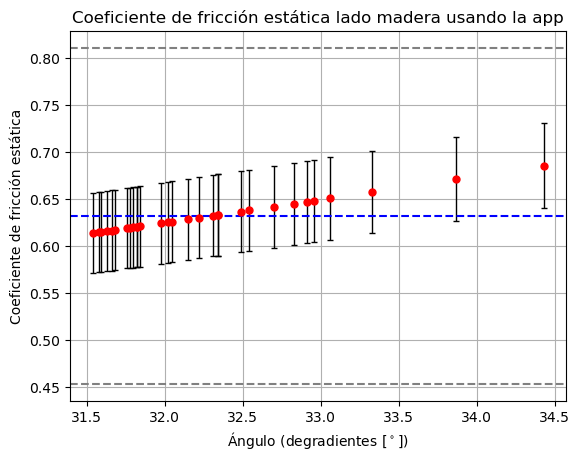

In [26]:
plt.errorbar(app_wood_top30, mu_wood_app, yerr=dmu_wood_app, fmt="o",
            markersize=5, color="red", ecolor="black", elinewidth=1,
            capsize=2, capthick=1)
plt.axhline(y=mu_app_wood, color='blue', linestyle='--')  # Línea horizontal
plt.axhline(y=mu_app_wood-dmu_app_wood, color='gray', linestyle='--')
plt.axhline(y=mu_app_wood+dmu_app_wood, color='gray', linestyle='--')
plt.title(r'Coeficiente de fricción estática lado madera usando la app')
plt.xlabel(r'Ángulo (degradientes [$^\circ$])')
plt.ylabel(r'Coeficiente de fricción estática')
plt.grid()
plt.savefig('grafica_maderaa_app.png', dpi=300)

In [27]:
# Calcula el coeficiente de fricción estática para la madera con el transportador
mu_wood_trans, dmu_wood_trans = coef_fric_est(integrated_wood, 1)

print(mu_wood_trans, dmu_wood_trans)

[0.72654253 0.57735027 0.57735027 0.55430905 0.67450852 0.57735027
 0.57735027 0.53170943 0.48773259 0.72654253 0.57735027 0.64940759
 0.46630766 0.53170943 0.57735027 0.53170943 0.60086062 0.55430905
 0.55430905 0.62486935 0.62486935 0.60086062 0.67450852 0.55430905
 0.50952545 0.60086062 0.55430905 0.53170943 0.46630766 0.64940759] [4.69140884 4.12310563 4.12310563 4.04726125 4.47797085 4.12310563
 4.12310563 3.97595499 3.8459317  4.69140884 4.12310563 4.38085054
 3.78675368 3.97595499 4.12310563 3.97595499 4.20377322 4.04726125
 4.04726125 4.28957502 4.28957502 4.20377322 4.47797085 4.04726125
 3.90892522 4.20377322 4.04726125 3.97595499 3.78675368 4.38085054]


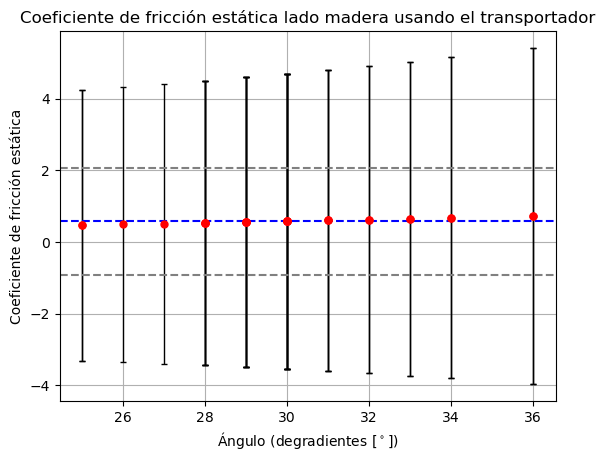

In [28]:
plt.errorbar(integrated_wood, mu_wood_trans, yerr=dmu_wood_trans, fmt="o",
            markersize=5, color="red", ecolor="black", elinewidth=1,
            capsize=2, capthick=1)
plt.axhline(y=mu_trans_wood, color='blue', linestyle='--')  # Línea horizontal
plt.axhline(y=mu_trans_wood-dmu_trans_wood, color='gray', linestyle='--')
plt.axhline(y=mu_trans_wood+dmu_trans_wood, color='gray', linestyle='--')
plt.title(r'Coeficiente de fricción estática lado madera usando el transportador')
plt.xlabel(r'Ángulo (degradientes [$^\circ$])')
plt.ylabel(r'Coeficiente de fricción estática')
plt.grid()
plt.savefig('grafica_madera_trans.png', dpi=300)

In [29]:
# Calcula el coeficiente de fricción estática para la tela con la app
mu_fabric_app, dmu_fabric_app = coef_fric_est(app_fabric_top30, 0.01)

print(mu_fabric_app, dmu_fabric_app)

[0.49814585 0.50382264 0.50710952 0.51062516 0.51768666 0.52101079
 0.52701716 0.53059057 0.53574596 0.5292493  0.49792802 0.50141777
 0.53126176 0.50185467 0.50185467 0.50776794 0.50098102 0.51635954
 0.50098102 0.50952545 0.51282753 0.51635954 0.52101079 0.52701716
 0.53979609 0.50996522 0.49749249 0.50032618 0.50732896 0.53170943] [0.03875679 0.03892168 0.03901803 0.03912179 0.03933243 0.03943262
 0.03961532 0.03972504 0.03988467 0.03968377 0.0387505  0.03885159
 0.03974573 0.0388643  0.0388643  0.0390374  0.0388389  0.03929262
 0.0388389  0.03908925 0.03918717 0.03929262 0.03943262 0.03961532
 0.04001119 0.03910225 0.03873794 0.03881989 0.03902448 0.03975955]


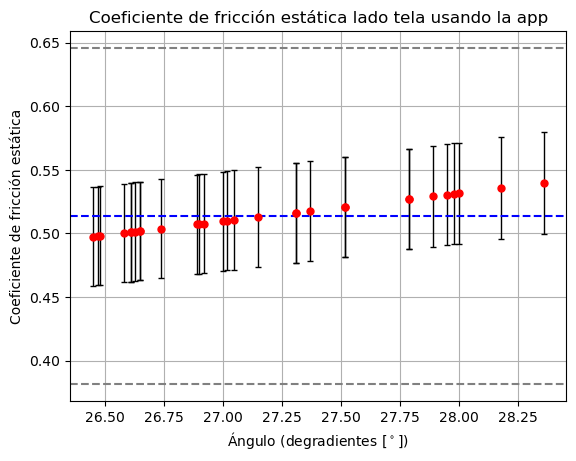

In [30]:
plt.errorbar(app_fabric_top30, mu_fabric_app, yerr=dmu_fabric_app, fmt="o",
            markersize=5, color="red", ecolor="black", elinewidth=1,
            capsize=2, capthick=1)
plt.axhline(y=mu_app_fabric, color='blue', linestyle='--')
plt.axhline(y=mu_app_fabric-dmu_app_fabric, color='gray', linestyle='--')
plt.axhline(y=mu_app_fabric+dmu_app_fabric, color='gray', linestyle='--')
plt.title(r'Coeficiente de fricción estática lado tela usando la app')
plt.xlabel(r'Ángulo (degradientes [$^\circ$])')
plt.ylabel(r'Coeficiente de fricción estática')
plt.grid()
plt.savefig('grafica_tela_app.png', dpi=300)

In [31]:
# Calcula el coeficiente de fricción estática para la tela con la app
mu_fabric_trans, dmu_fabric_trans = coef_fric_est(integrated_fabric, 1)

print(mu_fabric_trans, dmu_fabric_trans)

[0.48773259 0.53170943 0.57735027 0.46630766 0.57735027 0.48773259
 0.50952545 0.50952545 0.60086062 0.55430905 0.55430905 0.57735027
 0.57735027 0.50952545 0.53170943 0.50952545 0.53170943 0.57735027
 0.48773259 0.55430905 0.50952545 0.53170943 0.46630766 0.50952545
 0.53170943 0.48773259 0.48773259 0.48773259 0.53170943 0.57735027] [3.8459317  3.97595499 4.12310563 3.78675368 4.12310563 3.8459317
 3.90892522 3.90892522 4.20377322 4.04726125 4.04726125 4.12310563
 4.12310563 3.90892522 3.97595499 3.90892522 3.97595499 4.12310563
 3.8459317  4.04726125 3.90892522 3.97595499 3.78675368 3.90892522
 3.97595499 3.8459317  3.8459317  3.8459317  3.97595499 4.12310563]


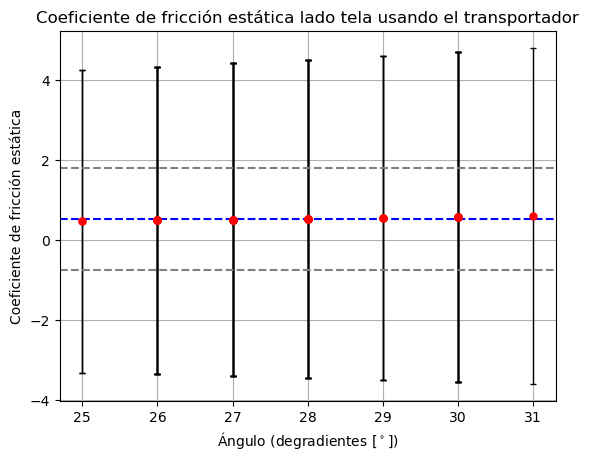

In [32]:
plt.errorbar(integrated_fabric, mu_fabric_trans, yerr=dmu_fabric_trans, fmt="o",
            markersize=5, color="red", ecolor="black", elinewidth=1,
            capsize=2, capthick=1)
plt.axhline(y=mu_trans_fabric, color='blue', linestyle='--')  # Línea horizontal
plt.axhline(y=mu_trans_fabric-dmu_trans_fabric, color='gray', linestyle='--')
plt.axhline(y=mu_trans_fabric+dmu_trans_fabric, color='gray', linestyle='--')
plt.title(r'Coeficiente de fricción estática lado tela usando el transportador')
plt.xlabel(r'Ángulo (degradientes [$^\circ$])')
plt.ylabel(r'Coeficiente de fricción estática')
plt.grid()
plt.savefig('grafica_tela_trans.png', dpi=300)

In [33]:
def suma_coeficientes(theta_i, sigma_i):
    a_i = 1 / (sigma_i) ** 2
    numerador = np.sum(a_i * np.tan(theta_i))
    denominador = np.sum(a_i)
    
    suma = numerador / denominador
    return suma

In [35]:
sum_trans_fabric = suma_coeficientes(mu_fabric_trans, dmu_fabric_trans)
sum_app_fabric = suma_coeficientes(mu_fabric_app, dmu_fabric_app)
sum_trans_wood = suma_coeficientes(mu_wood_trans, dmu_wood_trans)
sum_app_wood = suma_coeficientes(mu_wood_app, dmu_wood_app)

print("Suma transportador tela:", sum_trans_fabric)
print("Suma app tela:", sum_app_fabric)
print("Suma transportador madera:", sum_trans_wood)
print("Suma app madera:", sum_app_wood)

Suma transportador tela: 0.5812034560198971
Suma app tela: 0.5641920778029351
Suma transportador madera: 0.6515130784750968
Suma app madera: 0.7322522265333482
